In [1]:
import pickle
import numpy as np
import wntr
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
# matplotlib.rcParams['font.family'] = "sans-serif"

In [154]:
def cnk(n, k):
    res = 1
    for i in range(n, n-k, -1):
        res *= i
    res = res / n
    for j in range(k - 1, 1, -1):
        res = res / j 
    return res

In [155]:
def average_fl(nk):
    nk_fl = {}
    for key, value in nk.items():
        nk_fl[key] = sum(value.values()) / 23
    return nk_fl      

In [156]:
def nk_contribution(pipelist, k, nk_fl):
    # Initialization
    norm_factor = cnk(len(pipelist), k)
    contribution = {}
    # Check the corresponding functionality loss for each failure scenario
    for key, value in nk_fl.items():
        for pipe in key:
            contribution[pipe] = contribution.get(pipe, 0) + value
    for key, value in contribution.items():
        contribution[key] = value / norm_factor 
    return contribution 

In [157]:
# The ones that have similar values should have the same rank
def rankpipe(contributionk, threshold):
    # The basic rank
    rank_basic = sorted(contributionk, key = contributionk.get, reverse = True)
    # The realistic rank
    rank = 1
    refer = contributionk[rank_basic[0]]
    res = {}
    for i in range(len(rank_basic)):
        pipe = rank_basic[i]
        # Check the difference
        if abs(contributionk[pipe] - refer) < threshold:
            res[pipe] = rank
        else:
            # Update the rank and the reference value
            rank = i + 1
            refer = contributionk[pipe]
            res[pipe] = rank
    return res 

In [158]:
Wdn_name = 'Anytown'
Wdn = wntr.network.WaterNetworkModel(Wdn_name + '.inp')
Pipelist = Wdn.pipe_name_list

In [159]:
print(len(Pipelist))

40


In [160]:
K = 1
FN1 = open(Wdn_name + '_N1.pickle','rb')
N1 = pickle.load(FN1)
FN1.close()
N1_fl = average_fl(N1)
Contribution_1 = nk_contribution(Pipelist, K, N1_fl)

In [161]:
K = 2
FN2 = open(Wdn_name + '_N2.pickle','rb')
N2 = pickle.load(FN2)
FN2.close()
N2_fl = average_fl(N2)
Contribution_2 = nk_contribution(Pipelist, K, N2_fl)

In [162]:
K = 3
FN3 = open(Wdn_name + '_N3.pickle','rb')
N3 = pickle.load(FN3)
FN3.close()
N3_fl = average_fl(N3)
Contribution_3 = nk_contribution(Pipelist, K, N3_fl)

In [163]:
K = 4
FN4 = open(Wdn_name + '_N4.pickle','rb')
N4 = pickle.load(FN4)
FN4.close()
N4_fl = average_fl(N4)
Contribution_4 = nk_contribution(Pipelist, K, N4_fl)

In [164]:
K = 5
FN51 = open(Wdn_name + '_N5_part1.pickle','rb')
N51 = pickle.load(FN51)
FN51.close()
FN52 = open(Wdn_name + '_N5_part2.pickle','rb')
N52 = pickle.load(FN52)
FN52.close()
N5 = {}
Combined5 = [N51, N52] 
for C in Combined5:
    for key, value in C.items():
        N5[key] = value
N5_fl = average_fl(N5)
Contribution_5 = nk_contribution(Pipelist, K, N5_fl)

In [182]:
K = 6
FN61 = open(Wdn_name + '_N6_part1.pickle','rb')
N61 = pickle.load(FN61)
FN61.close()
FN62 = open(Wdn_name + '_N6_part2.pickle','rb')
N62 = pickle.load(FN62)
FN62.close()
FN63 = open(Wdn_name + '_N6_part3.pickle','rb')
N63 = pickle.load(FN63)
FN63.close()
FN64 = open(Wdn_name + '_N6_part4.pickle','rb')
N64 = pickle.load(FN64)
FN64.close()
FN65 = open(Wdn_name + '_N6_part5.pickle','rb')
N65 = pickle.load(FN65)
FN65.close()
FN66 = open(Wdn_name + '_N6_part6.pickle','rb')
N66 = pickle.load(FN66)
FN66.close()
FN67 = open(Wdn_name + '_N6_part7.pickle','rb')
N67 = pickle.load(FN67)
FN67.close()
FN68 = open(Wdn_name + '_N6_part8.pickle','rb')
N68 = pickle.load(FN68)
FN68.close()
FN69 = open(Wdn_name + '_N6_part9.pickle','rb')
N69 = pickle.load(FN69)
FN69.close()
FN610 = open(Wdn_name + '_N6_part10.pickle','rb')
N610 = pickle.load(FN610)
FN610.close()

N6 = {}
Combined6 = [N61, N62, N63, N64, N65, N66, N67, N68, N69, N610] 
for C in Combined6:
    for key, value in C.items():
        N6[key] = value
N6_fl = average_fl(N6)

In [183]:
Contribution_6 = nk_contribution(Pipelist, K, N6_fl)

In [207]:
Threshold = 1e-2

In [208]:
Rank1 = rankpipe(Contribution_1, Threshold)

In [209]:
Combined12 = [Contribution_1, Contribution_2]
Contribution12 = {}
for C in Combined12:
    for key, value in C.items():
        Contribution12[key] = Contribution12.get(key, 0) + value
Rank12 = rankpipe(Contribution12, Threshold)

In [210]:
Combined123 = [Contribution_1, Contribution_2, Contribution_3]
Contribution123 = {}
for C in Combined123:
    for key, value in C.items():
        Contribution123[key] = Contribution123.get(key, 0) + value
Rank123 = rankpipe(Contribution123, Threshold)

In [211]:
Combined1234 = [Contribution_1, Contribution_2, Contribution_3, Contribution_4]
Contribution1234 = {}
for C in Combined1234:
    for key, value in C.items():
        Contribution1234[key] = Contribution1234.get(key, 0) + value
Rank1234 = rankpipe(Contribution1234, Threshold)

In [212]:
Combined12345 = [Contribution_1, Contribution_2, Contribution_3, Contribution_4, Contribution_5]
Contribution12345 = {}
for C in Combined12345:
    for key, value in C.items():
        Contribution12345[key] = Contribution12345.get(key, 0) + value
Rank12345 = rankpipe(Contribution12345, Threshold)
# Rank12345

In [213]:
Combined123456 = [Contribution_1, Contribution_2, Contribution_3, Contribution_4, Contribution_5, Contribution_6]
Contribution123456 = {}
for C in Combined123456:
    for key, value in C.items():
        Contribution123456[key] = Contribution123456.get(key, 0) + value
Rank123456 = rankpipe(Contribution123456, Threshold)
# Rank123456

In [222]:
FRank123456 = open(Wdn_name + '_N6_piperanking.pickle','wb')
pickle.dump(Rank123456, FRank123456)
FRank123456.close()

In [214]:
Pipe_rank = list(Rank123456.keys())
X = np.linspace(1, len(Pipelist), len(Pipelist))

In [215]:
Y1 = []
for i in range(len(Pipe_rank)):
    Y1.append(Rank1[Pipe_rank[i]])

In [216]:
Y12 = []
for i in range(len(Pipe_rank)):
    Y12.append(Rank12[Pipe_rank[i]])

In [217]:
Y123 = []
for i in range(len(Pipe_rank)):
    Y123.append(Rank123[Pipe_rank[i]])
# Y123

In [218]:
Y1234 = []
for i in range(len(Pipe_rank)):
    Y1234.append(Rank1234[Pipe_rank[i]])
# Y1234

In [219]:
Y12345 = []
for i in range(len(Pipe_rank)):
    Y12345.append(Rank12345[Pipe_rank[i]])
# Y12345

In [220]:
Y123456 = []
for i in range(len(Pipe_rank)):
    Y123456.append(Rank123456[Pipe_rank[i]])
# Y123456

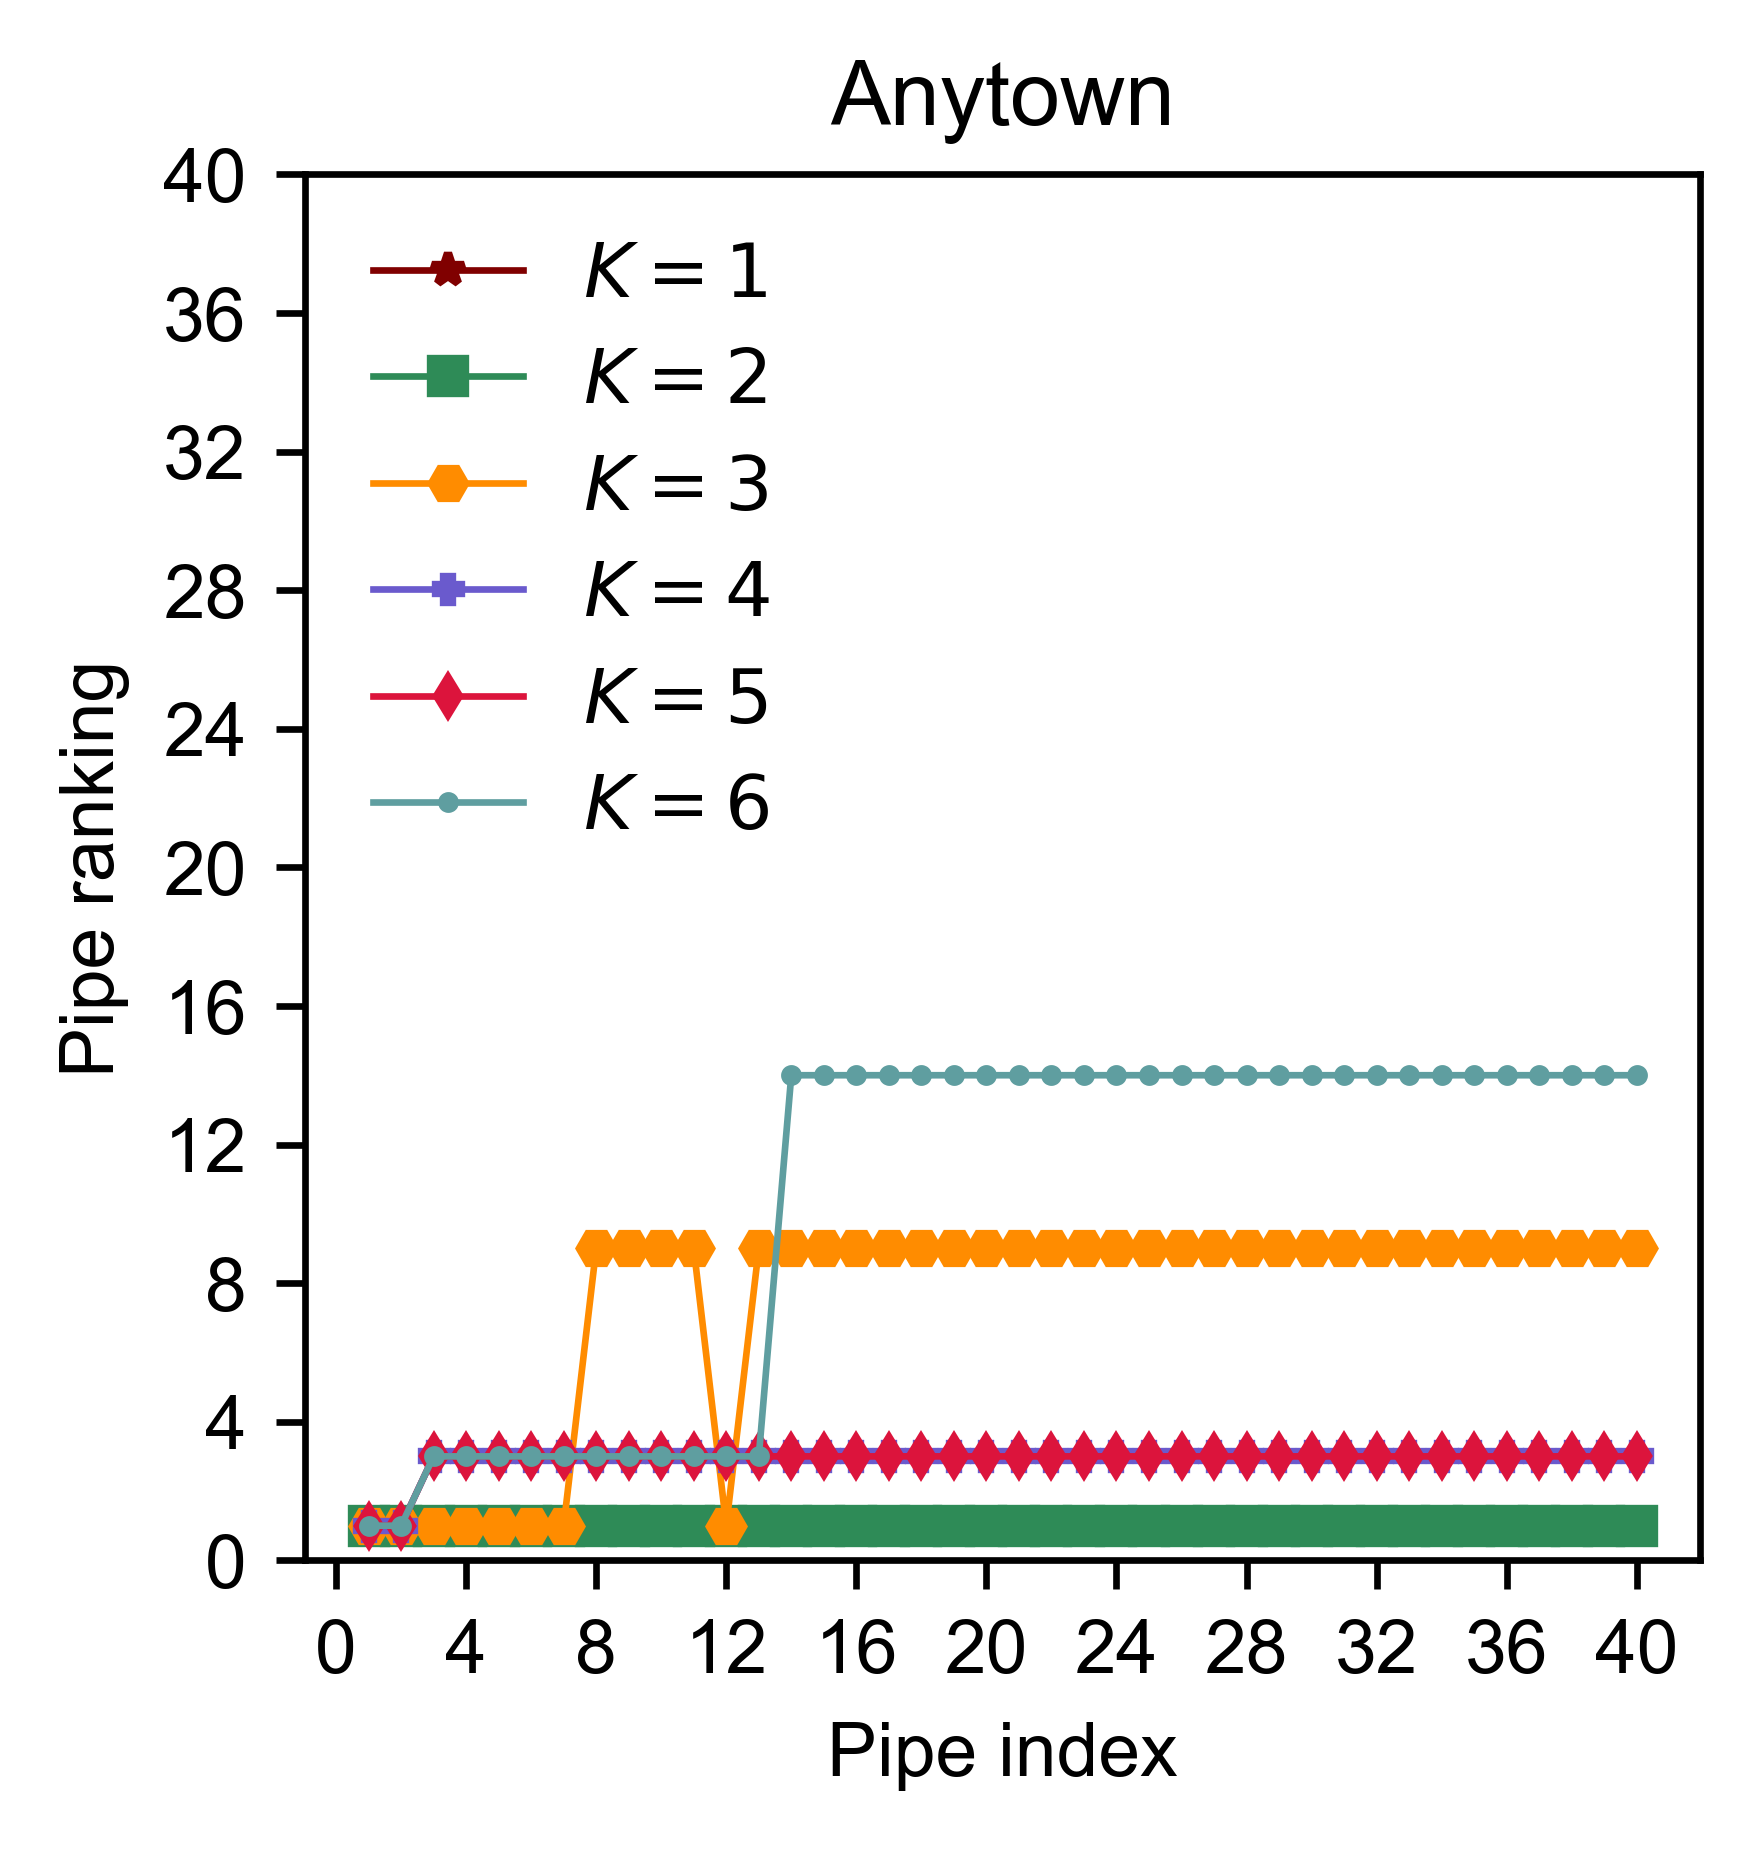

In [221]:
matplotlib.rcParams.update({'font.size': 9})
plt.plot(X, Y1, marker = '*', c = 'maroon', markersize = 4, linewidth = 0.8,label = '$K=1$')
plt.plot(X, Y12, marker = 's', c = 'seagreen', markersize = 4, linewidth = 0.8, label = '$K=2$')
plt.plot(X, Y123, marker = 'H', c = 'darkorange', markersize = 4, linewidth = 0.8, label = '$K=3$')
plt.plot(X, Y1234, marker = 'P', c = 'slateblue', markersize = 3, linewidth = 0.8, label = '$K=4$')
plt.plot(X, Y12345, marker = 'd', c = 'crimson', markersize = 3, linewidth = 0.8, label = '$K=5$')
plt.plot(X, Y123456, marker = '.', c = 'cadetblue', markersize = 3, linewidth = 0.8, label = '$K=6$')
plt.xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40])
plt.yticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40])
plt.xlabel('Pipe index')
plt.ylabel('Pipe ranking')
plt.title('Anytown')
plt.legend(frameon=False, loc = 'upper left')
plt.rcParams['figure.figsize'] = (3, 3) 
plt.rcParams['savefig.dpi'] = 600 
plt.rcParams['figure.dpi'] = 600 
plt.savefig(r"Anytown_pipe_rank.jpg", bbox_inches='tight')
plt.show()

### Visualize the mitigated pipe list